## Pollution in Barcelona Eixample (2018 - 2023)
***
### Data preprocessing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv('cont_bcn_eixample_18_23_clean.csv')

df

,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,O3,PM10,SO2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-01-01,2018,1,1,winter,0.21,10.71,21.25,55.21,16.62,1.00
1,Barcelona (Eixample),26,41.385315,2.1538,2018-01-02,2018,1,2,winter,0.36,20.00,37.42,36.79,16.17,2.00
2,Barcelona (Eixample),26,41.385315,2.1538,2018-01-03,2018,1,3,winter,0.34,17.58,24.04,36.62,15.67,2.04
3,Barcelona (Eixample),26,41.385315,2.1538,2018-01-04,2018,1,4,winter,0.31,15.92,26.96,32.33,17.12,1.96
4,Barcelona (Eixample),26,41.385315,2.1538,2018-01-05,2018,1,5,winter,0.34,21.27,43.50,25.50,12.45,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,Barcelona (Eixample),26,41.385315,2.1538,2023-12-16,2023,12,16,autumn,0.37,17.54,45.58,24.33,23.25,3.38
2025,Barcelona (Eixample),26,41.385315,2.1538,2023-12-17,2023,12,17,autumn,0.44,21.88,52.92,16.25,25.92,4.38
2026,Barcelona (Eixample),26,41.385315,2.1538,2023-12-18,2023,12,18,autumn,1.00,94.96,83.00,4.12,55.17,8.04
2027,Barcelona (Eixample),26,41.385315,2.1538,2023-12-19,2023,12,19,autumn,1.04,99.12,69.42,12.38,53.08,8.29


Para aplicar Machine Learning tenemos que eliminar todas las columnas que no sean necesarias para el algoritmo. En este caso eliminaré las siguientes: nom_estacio, altitud, latitud, longitud (no varían, son iguales en cada registro) y data (ya dividí la fecha en otras tres columnas y sería redundante (multicolinealidad)).

In [8]:
# Eliminar las columnas que no se necesitan

df = df.drop(['nom_estacio', 'altitud', 'latitud', 'longitud', 'data'], axis=1)

df

,year,month,day,season,CO,NO,NO2,O3,PM10,SO2
0,2018,1,1,winter,0.21,10.71,21.25,55.21,16.62,1.00
1,2018,1,2,winter,0.36,20.00,37.42,36.79,16.17,2.00
2,2018,1,3,winter,0.34,17.58,24.04,36.62,15.67,2.04
3,2018,1,4,winter,0.31,15.92,26.96,32.33,17.12,1.96
4,2018,1,5,winter,0.34,21.27,43.50,25.50,12.45,1.68
...,...,...,...,...,...,...,...,...,...,...
2024,2023,12,16,autumn,0.37,17.54,45.58,24.33,23.25,3.38
2025,2023,12,17,autumn,0.44,21.88,52.92,16.25,25.92,4.38
2026,2023,12,18,autumn,1.00,94.96,83.00,4.12,55.17,8.04
2027,2023,12,19,autumn,1.04,99.12,69.42,12.38,53.08,8.29


Cuando se trabaja con ML que requieren datos numéricos, es común convertir variables categóricas en columnas dummies. En este caso convierto el atributo 'season' en una variable binaria (one-hot encoding).

In [10]:
# Columnas dummies

df = pd.get_dummies(df, columns=['season'], drop_first=True)

df

,year,month,day,CO,NO,NO2,O3,PM10,SO2,season_spring,season_summer,season_winter
0,2018,1,1,0.21,10.71,21.25,55.21,16.62,1.00,0,0,1
1,2018,1,2,0.36,20.00,37.42,36.79,16.17,2.00,0,0,1
2,2018,1,3,0.34,17.58,24.04,36.62,15.67,2.04,0,0,1
3,2018,1,4,0.31,15.92,26.96,32.33,17.12,1.96,0,0,1
4,2018,1,5,0.34,21.27,43.50,25.50,12.45,1.68,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2023,12,16,0.37,17.54,45.58,24.33,23.25,3.38,0,0,0
2025,2023,12,17,0.44,21.88,52.92,16.25,25.92,4.38,0,0,0
2026,2023,12,18,1.00,94.96,83.00,4.12,55.17,8.04,0,0,0
2027,2023,12,19,1.04,99.12,69.42,12.38,53.08,8.29,0,0,0


Para realizar ML es interesante saber las correlaciones que hay entre los diferentes atributos, ya que ayuda en la selección de características relevantes para un modelo. Si dos variables están altamente correlacionadas, es posible que una de ellas aporte información redundante al modelo, y podrías considerar eliminar una de ellas para simplificar el modelo y evitar problemas de multicolinealidad (anteriormente ya he eliminado la variable data que aportaba redundancia).

<Axes: >

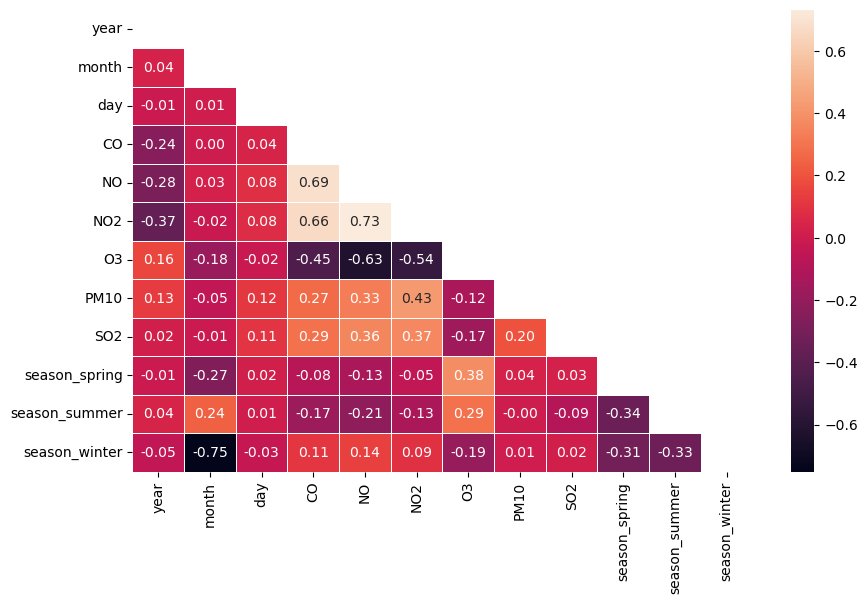

In [6]:
# Mapa de calor

plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, mask=mask)

Las correlaciones positivas más altas se producen entre los siguientes contaminantes:

- CO y NO
- CO y NO2
- NO y NO2

Esto quiere decir que, a medida que aumenta un contaminante, el otro también aumentará. Por el contrario, el O3 tiene correlaciones negativas con los demás contaminantes, destacando el NO con -0.63 (es decir, si sube el O3, baja el NO). Sin embargo, cabe resaltar que ninguna correlación del dataset es excepcionalmente alta.

Seguidamente, miraremos los outliers de cada variable.

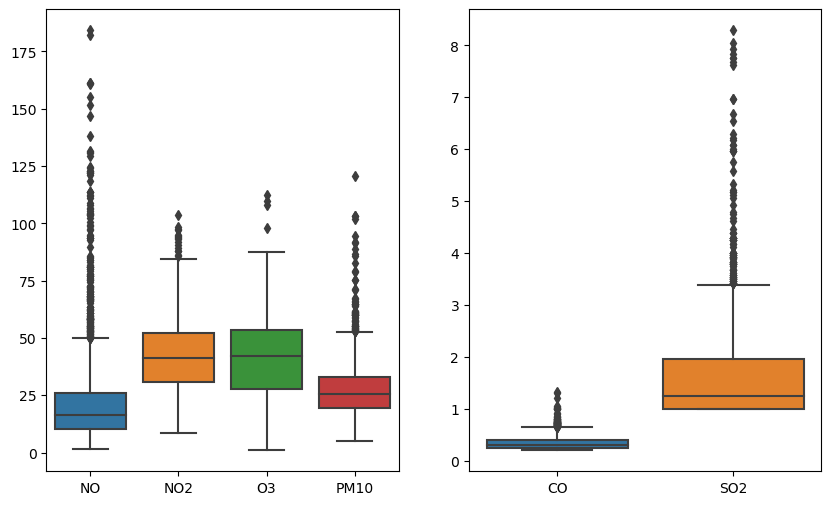

In [8]:
# Boxplot para ver los outliers

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data=df[['NO', 'NO2', 'O3', 'PM10']], ax=axs[0]) 
sns.boxplot(data=df[['CO', 'SO2']], ax=axs[1])
plt.show()

Observamos como todos los contaminantes tienen outliers en sus registros. Esta información nos servirá por si queremos hacer una estandarización o una normalización antes de aplicar un algoritmo de ML. También es importante saber qué tipo de distribución tienen las variables. En este caso, ya he mirado si las variables seguían una distribución normal en el anterior paso (1_Data_Cleaning_EDA), aunque ahora lo compruebo numéricamente.

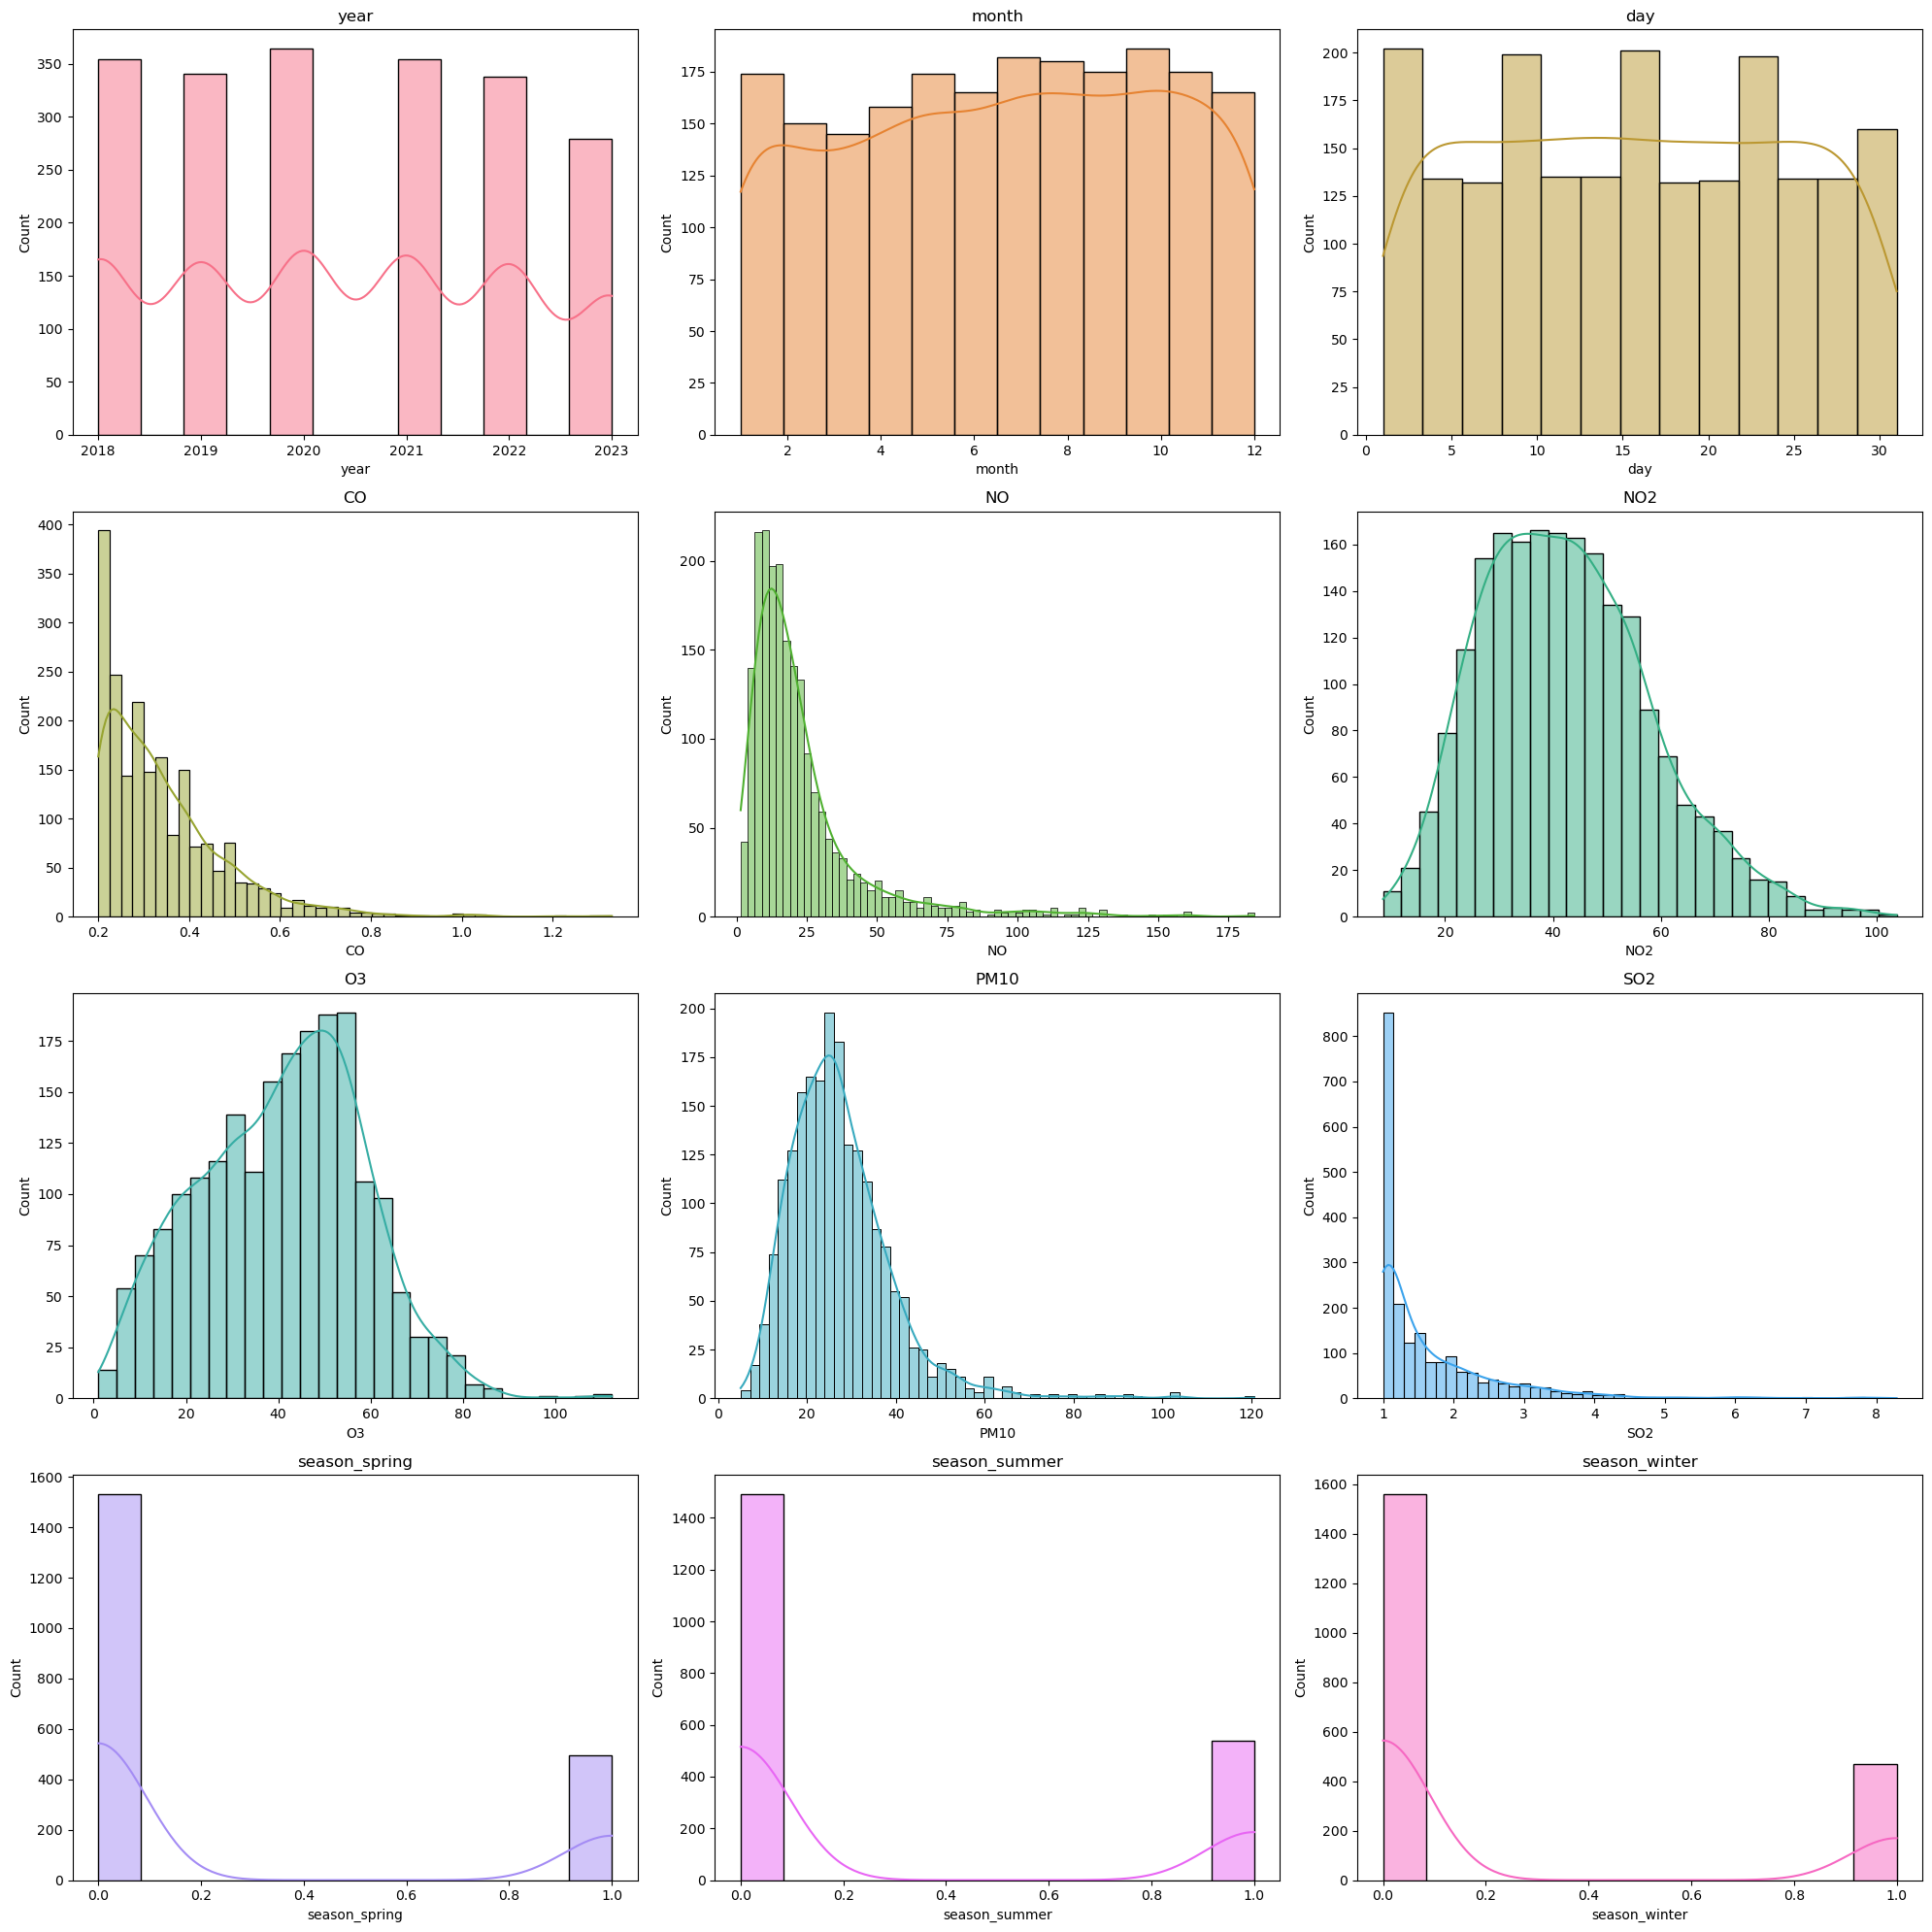

In [23]:
# Mirar si las variables siguen una distribución normal

plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=12)

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i +1)
    sns.histplot(data=df,x=df[column],kde=True,color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

In [11]:
from scipy import stats

for column in df.columns:
    shapiro_test = stats.shapiro(df[column])
    print(f"{column} | P-value: {shapiro_test.pvalue}")
    
    if shapiro_test.pvalue > 0.05:
        print("It has a normal distribution.\n")
    else:
        print("It doesn't have a normal distribution.\n")


year | P-value: 9.220739318323261e-33
It doesn't have a normal distribution.

month | P-value: 2.3996137623602376e-27
It doesn't have a normal distribution.

day | P-value: 9.108132791418437e-25
It doesn't have a normal distribution.

CO | P-value: 1.0908127635843674e-40
It doesn't have a normal distribution.

NO | P-value: 0.0
It doesn't have a normal distribution.

NO2 | P-value: 5.660775184850877e-16
It doesn't have a normal distribution.

O3 | P-value: 2.0391736910152503e-11
It doesn't have a normal distribution.

PM10 | P-value: 9.207437606772405e-36
It doesn't have a normal distribution.

SO2 | P-value: 0.0
It doesn't have a normal distribution.

season_spring | P-value: 0.0
It doesn't have a normal distribution.

season_summer | P-value: 0.0
It doesn't have a normal distribution.

season_winter | P-value: 0.0
It doesn't have a normal distribution.



Ahora guardo el dataset en un archivo CSV con las modificaciones del preprocesado para hacer ML.

In [40]:
# Guardar el df para ML en un archivo csv

df_archivo = "cont_bcn_eixample_18_23_ML.csv"
df.to_csv(df_archivo, index=False)

### Machine Learning

La elección del algoritmo de ML para predecir la concentración de contaminantes en el futuro depende de varios factores, como la naturaleza de los datos, la cantidad de datos disponibles o la complejidad del problema. Es esencial realizar un análisis exploratorio de datos, entender la naturaleza del problema y experimentar con varios algoritmos para determinar cuál se ajusta mejor. En este caso, a partir del conocimiento proporcionado por el EDA, he escogido algunos modelos de regresión que podrían ser los más adecuados al proyecto:

- **Regresión Lineal (LR)**: Este modelo es útil cuando existe una relación lineal entre las variables predictoras y la variable target.
- **K-Nearest Neighbors Regressor (KNR)**: Es un algoritmo simple que para hacer una predicción, el modelo identifica los k vecinos más cercanos en el conjunto de entrenamiento.
- **DecisionTreeRegressor (DTR)**: Es un modelo de regresión basado en árboles de decisión y utiliza un enfoque no lineal para modelar las relaciones entre las características y la variable objetivo.
- **Random Forest Regression (RFR)**: Es un modelo robusto y puede manejar datos no lineales y variables predictoras de alta dimensionalidad.
- **Multi-Layer Perceptron Regressor (MLR)**: Es un modelo de regresión basado en redes neuronales artificiales de varias capas para predecir valores numéricos continuos en lugar de etiquetas categóricas.

Para decidir cuál de ellos escojo, realizo una función que calcule la MSE y R2 de cada uno de los modelos descritos. Con estos datos podré escoger el que más se ajusta al dataset.

In [22]:
# Train-test

X = df.drop('NO2', axis=1)
y = df['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Crear el modelo

lir = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)

# Entrenar el modelo

lir.fit(X_train, y_train)
knr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Predicciones

y_pred_lir = lir.predict(X_test)
y_pred_knr = knr.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_mlp = mlp.predict(X_test)

# Evaluar el rendimiento

def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(3)
    r2 = r2_score(y_test, y_pred).round(3)
    return mse, r2

resultados_lir = evaluar_modelo(lir, X_test, y_test)
resultados_knr = evaluar_modelo(knr, X_test, y_test)
resultados_dtr = evaluar_modelo(dtr, X_test, y_test)
resultados_rfr = evaluar_modelo(rfr, X_test, y_test)
resultados_mlp = evaluar_modelo(mlp, X_test, y_test)

# Resultados

print(f"LIR: {resultados_lir}")
print(f"KNR: {resultados_knr}")
print(f"DTR: {resultados_dtr}")
print(f"RFR: {resultados_rfr}")
print(f"MLP: {resultados_mlp}")

LIR: (68.849, 0.713)
KNR: (52.587, 0.781)
DTR: (79.592, 0.668)
RFR: (40.929, 0.829)
MLP: (49.292, 0.794)


Para analizar los estos resultados recordamos que:

- El Error Cuadrático Medio (MSE) es una medida de la precisión del modelo, donde valores más bajos indican un mejor rendimiento.
- El Coeficiente de Determinación (R2) mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Los valores cercanos a 1 indican un buen ajuste del modelo.

Si tenemos que elegir un algoritmo basándonos en estos números, los resultados nos indican que RFR tiene el MSE más bajo y el R2 más alto, por lo tanto, es una elección sólida como modelo principal. Para mejorarlo, ajustaré los mejores hiperparámetros, es decir, encontrar la combinación óptima de estos.

Primero, se debe identificar qué hiperparámetros del modelo se pueden ajustar, especificar los rangos o valores posibles que se deben probar para cada uno, entrenar el modelo con diferentes combinaciones y evaluar su rendimiento utilizando métricas relevantes.

In [15]:
# Hiperparámetros

rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [16]:
# Definición de hiperparámetros Random Forest Regressor

param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rfr, 
                           param_grid=param, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           error_score='raise')

# Entrenamient del modelo
grid_search.fit(X_train, y_train)

# Encontrar los mejores hiperparámetros 
best_param = grid_search.best_params_

# Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred_best_model = best_model.predict(X_test)

mse_best_model = mean_squared_error(y_test, y_pred_best_model).round(3)
r2_best_model = r2_score(y_test, y_pred_best_model).round(3)

print('Random Forest Regressor')
print(f'Mejores hiperparámetros: {best_param}')
print(f'MSE - Mejores hiperparámetros: {mse_best_model}')
print(f'R² - Mejores hiperparámetros: {r2_best_model}')

Random Forest Regressor
Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MSE - Mejores hiperparámetros: 40.549
R² - Mejores hiperparámetros: 0.831


Vemos que el modelo escogido (RFR) ha mejorado muy ligeramente con los hiperparámetros. Seguidamente, realizo una cross-validation para verificar su eficiencia.

In [17]:
# Definir el modelo con los hiperparámetros anteriores

rfr_best_param = RandomForestRegressor(criterion='squared_error',
                                       max_depth=20,
                                       min_samples_leaf=2,
                                       min_samples_split=2,
                                       n_estimators=200 )

# Cross-validation
scores = cross_val_score(rfr_best_param, X, y, cv=5, scoring='r2').round(3)

# Resultados de R² por cada fold
print('R² por cada fold:', scores)

# Calcular la media y std de los resultados de R²
r2_mean = scores.mean().round(3)
r2_std = scores.std().round(3)

print('Media de R²:', r2_mean)
print('Desviación estándard de R²:', r2_std)

R² por cada fold: [0.724 0.866 0.752 0.703 0.631]
Media de R²: 0.735
Desviación estándard de R²: 0.077


La media de R² (0.735) sugiere que, en promedio, el modelo explica el 73.5% de la variabilidad en la variable objetivo durante la validación cruzada. Por otro lado, la desviación estándar de R² (0.077) indica que hay cierta variabilidad en el rendimiento del modelo entre los diferentes folds. En general, un R² cercano a 1 indica un buen ajuste del modelo a los datos y en este caso, el modelo parece tener un rendimiento razonablemente bueno, especialmente considerando que el R² más bajo es 0.631 y el R² más alto es 0.866.

In [18]:
# Accuracy

accuracy = rfr.score(X_test, y_test).round(3)

print(f'Random Forest Regressor tiene una acierto del {accuracy* 100:.1f}% de las ocasiones.')

Random Forest Regressor tiene una acierto del 82.9% de las ocasiones.


### Prediction

Ahora que tengo el modelo y he escogido los mejores hiperparámetros, voy a realizar una predicción aleatoria de un contaminante (el escogido desde un principio, NO2) para el año 2030. Para hacer una predicción debemos rellenar todos los atributos,en este dataset son los siguientes:

- year
- month	
- day
- CO
- NO
- O3	
- PM10	
- SO2	
- season_spring	
- season_summer	
- season_winter

Los datos entrados deben coincidir con los de las columnas.

In [25]:
rfr_best_param.fit(X, y)

input_data = pd.DataFrame([['2030', '1', '5', '0.40', '22', '30', '13', '2', '0', '0', '1']],
                           columns=df.drop('NO2', axis=1).columns)


prediccion_2030 = rfr_best_param.predict(input_data)


print(f'En 2030 habrá una concentración de {prediccion_2030.round(2)} µg/m3 de NO2')

En 2030 habrá una concentración de [46.25] µg/m3 de NO2


***
En principio el proyecto finalizaría aquí, ya que hemos podido predecir la concentración de un contaminante en un año futuro. Pero, si nos centramos en el mecanismo de la predicción, vemos que es poco preciso tener que rellenar las variables de los contaminantes, puesto que debemos inventarnos/intuir que concentración habrá de estos en el año que queramos predecir y, consecuentemente puede haber un sesgo en la predicción. En el siguiente apartado (3_ML_pollutants) intentaré hacer la predicción uno a uno, para facilitar la predicción y hacer más sencillo al usuario ver los resultados.